We will plot the popularity of Starcraft 2 as an e-Sport (measured using the amount of games played at the competitive-level) as a function of time, using different colors to denote the Korean and non-Korean ecosystems. 

Note that the Korean/non-Korean distinction arises for historic reasons, since the Korean competition has roots in Starcraft 2's precedessor, which has been played professionally in televised games in South Korea since around 2010. 

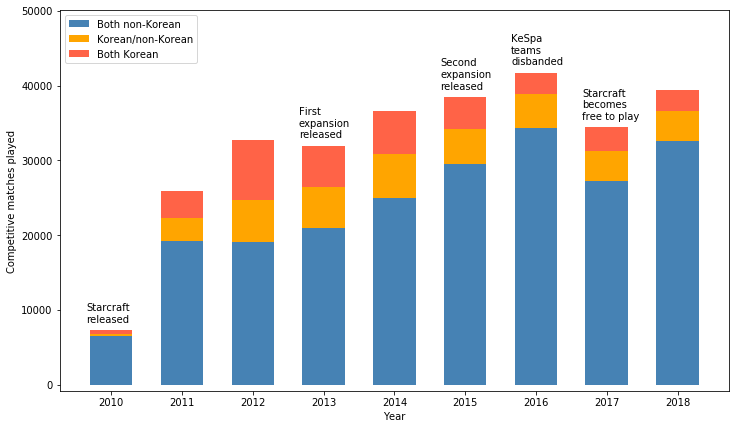

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data
players = pd.read_csv('player_db.csv', low_memory=False)
matches = pd.read_csv('match_db.csv', low_memory=False)

# compute the amount of non-Korean players in any given match 
foreign_players_playing = matches.apply(lambda row: int(players.loc[row['PLAYERA_ID'],'COUNTRY'] != 'KR') + 
                                  int(players.loc[row['PLAYERB_ID'],'COUNTRY'] != 'KR'), axis=1)

# the information necessary for the bar graph 
matches['YEAR'] = matches['DATE'].map(lambda s: int(s[:4]))
foreign_matches_per_year = matches[(matches['YEAR'] <= 2018) & (foreign_players_playing == 2)].groupby('YEAR').size().values
mixed_matches_per_year = matches[(matches['YEAR'] <= 2018) & (foreign_players_playing == 1)].groupby('YEAR').size().values
korean_matches_per_year = matches[(matches['YEAR'] <= 2018) & (foreign_players_playing == 0)].groupby('YEAR').size().values
total_matches_per_year = matches[matches['YEAR'] <= 2018].groupby('YEAR').size()
highest_bar = max(total_matches_per_year.values)

# graph the amount of games in any given year up to 2018
plt.figure(figsize=(12, 7))
bar_width = 0.6
plt.bar(range(2010, 2019), foreign_matches_per_year, width=bar_width, color='steelblue', label="Both non-Korean")
plt.bar(range(2010, 2019), mixed_matches_per_year, bottom=foreign_matches_per_year, 
        width=bar_width, color='orange', label="Korean/non-Korean")
plt.bar(range(2010, 2019), korean_matches_per_year, bottom=(mixed_matches_per_year+foreign_matches_per_year), 
        width=bar_width, color='tomato', label="Both Korean")
text_offset = highest_bar*0.025
plt.annotate(xy=(2009.65, total_matches_per_year[2010] + text_offset), s='Starcraft\nreleased')
plt.annotate(xy=(2012.65, total_matches_per_year[2013] + text_offset), s='First\nexpansion\nreleased')
plt.annotate(xy=(2014.65, total_matches_per_year[2015] + text_offset), s='Second\nexpansion\nreleased')
plt.annotate(xy=(2015.65, total_matches_per_year[2016] + text_offset), s='KeSpa\nteams\ndisbanded')
plt.annotate(xy=(2016.65, total_matches_per_year[2017] + text_offset), s='Starcraft\nbecomes\nfree to play')
plt.ylim(highest_bar* -0.02, highest_bar*1.2)
plt.ylabel('Competitive matches played')
plt.xticks(ticks=(range(2010, 2019)))
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()

We can see that:
- the total popularity of the game at the competitive level has been steadily growing until around 2016, fueled by the growth of the the non-Korean ecosystem - in fact, the Korean ecosystem peaked around 2012 and has been in slow decline ever since, stabilizing for the last three years. 
- in 2016/2017 we have a huge drop in the amount of games played, this is perhaps explained by the [match fixing scandal](https://www.pcgamer.com/eight-arrested-in-starcraft-ii-match-fixing-scandal/) which led to the dissolution of the large Starcraft 2 teams as advertisers tried to disassociate themselves from the brand. Interestingly, the scandal took place in South Korea, but its biggest effect was on the non-Korean ecosystem. 
- making the game free-to-play, even seven years after its release, was a right decision, leading to a surprising growth in the amount of games [as well as in viewership](https://www.dailyesports.gg/starcraft-ii-shows-steady-viewership-growth-over-2017/)
- even though the Korean players dominate in terms of performance, earnings (see the other plot) and media coverage, the Korean competitive Starcraft 2 is surprisingly only a small fraction of the whole thing 